Importando Bibliotecas

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Importando o dataset

In [4]:
tempo = pd.read_csv('../Arquivos/monitoramento_tempo.csv', sep=",")
tempo.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [5]:
tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [8]:
tempo["data"] = pd.to_datetime(tempo["data"])
tempo.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


Text(0.5, 1.0, 'Temperatura no tempo')

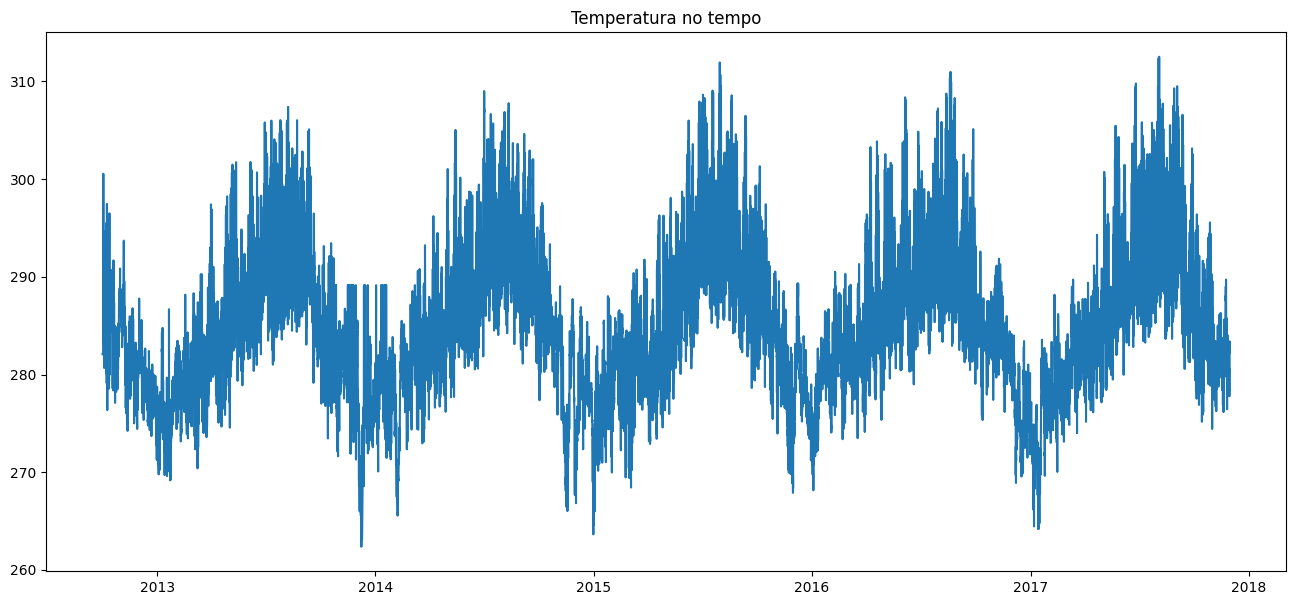

In [20]:
plt.figure(figsize=(16,7))
plt.plot(tempo.data, tempo.temperatura)
plt.title("Temperatura no tempo")

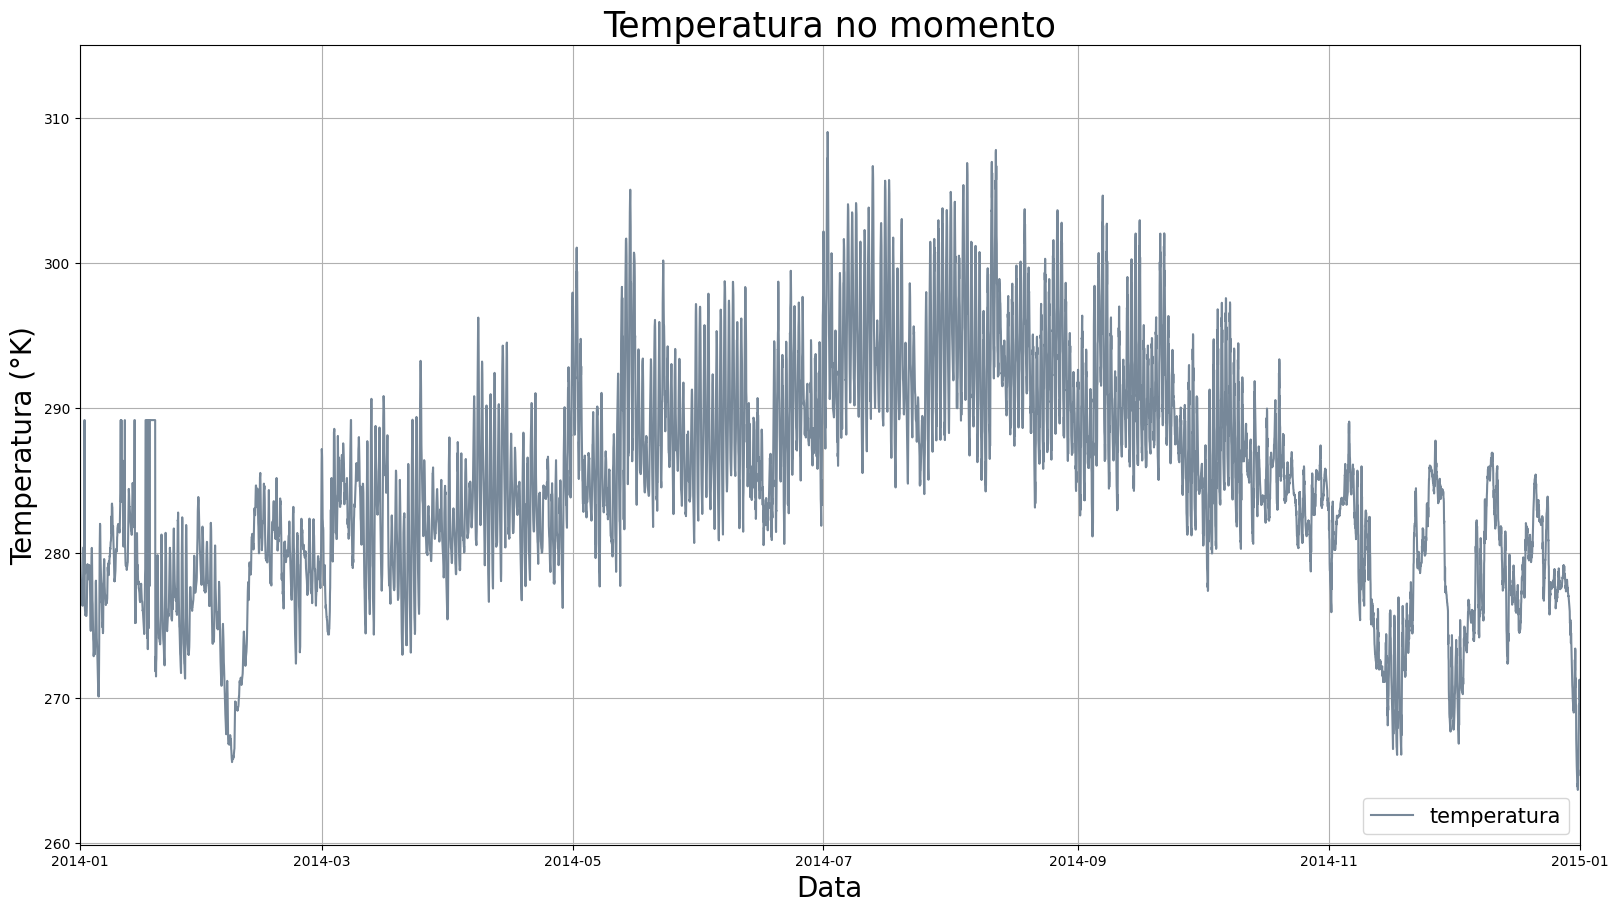

In [39]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(tempo.data, tempo.temperatura, color = 'lightslategray')

eixo.set_xlim (datetime.datetime(2014, 1, 1), datetime.datetime(2015, 1, 1))
eixo.set_title("Temperatura no momento", fontsize = 25)
eixo.set_ylabel("Temperatura (°K)", fontsize = 20)
eixo.set_xlabel("Data", fontsize = 20)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 15)
eixo.grid(True)

Aula 2

Customizando nossas visualização

Text(0, 0.5, 'Temperatura (°K)')

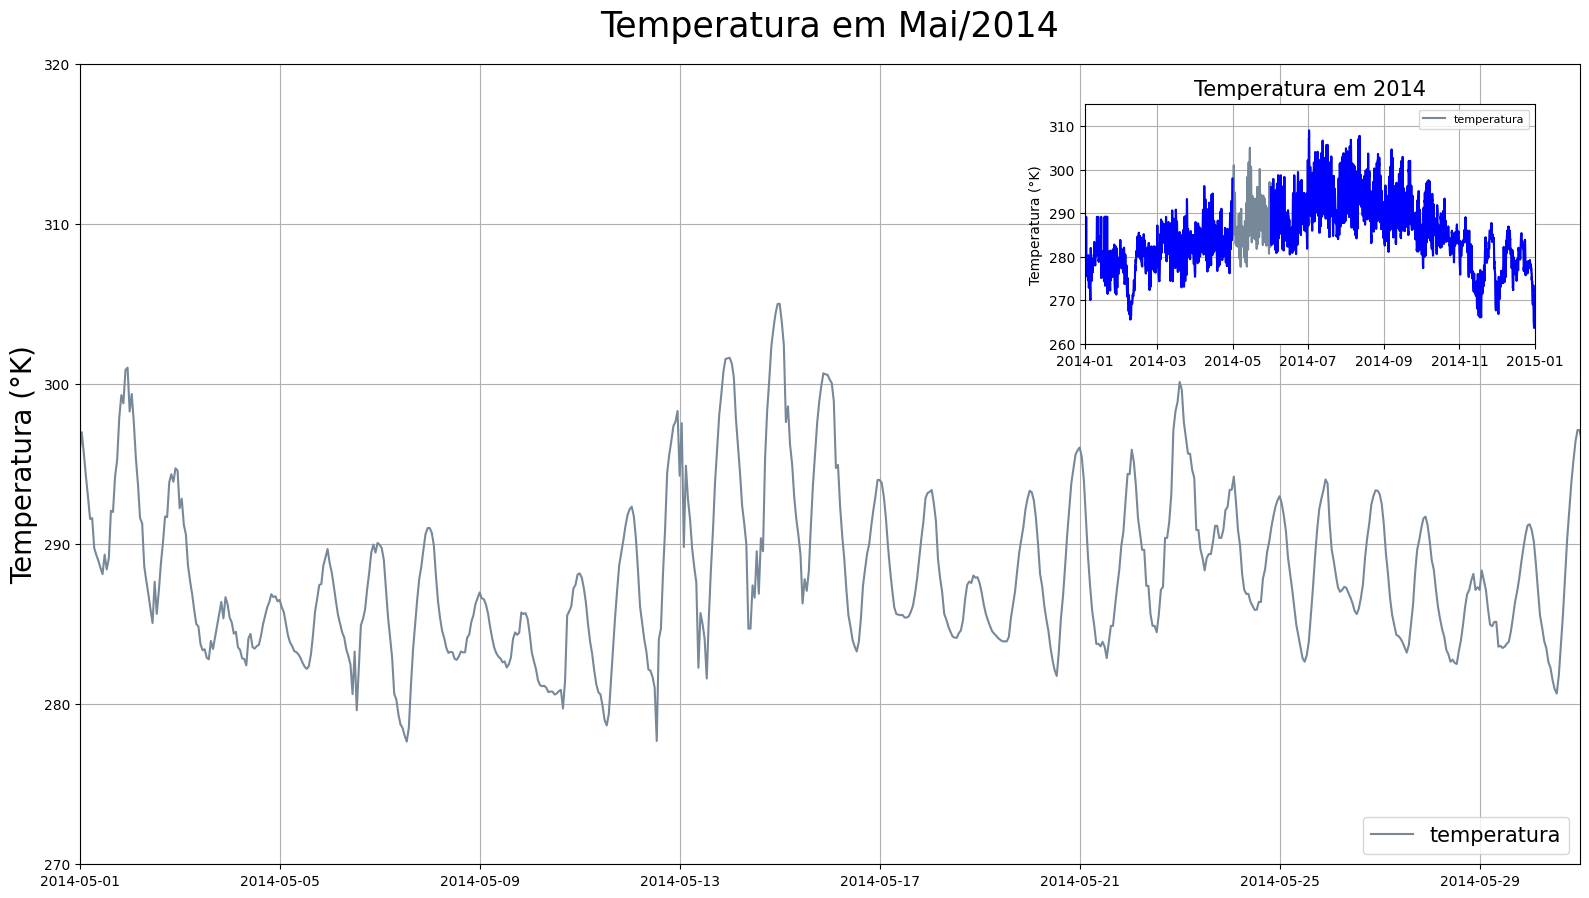

In [63]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.67, 0.65, 0.3, 0.3 ])

eixo.grid(True)
eixo.plot(tempo.data, tempo.temperatura, color = 'lightslategray')
eixo.set_xlim(datetime.datetime(2014, 5, 1), datetime.datetime(2014, 5, 31))
eixo.set_ylim(270, 320)
eixo.set_title("Temperatura em Mai/2014", fontsize = 25, pad = 20)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 15)
eixo.set_ylabel("Temperatura (°K)", fontsize = 20)

azul_esquerda = tempo.data < datetime.datetime(2014, 5, 1)
azul_direita = tempo.data > datetime.datetime(2014, 6, 1)

eixo2.plot(tempo.data, tempo.temperatura, color = 'lightslategray')
eixo2.plot(tempo[azul_esquerda]['data'], tempo[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(tempo[azul_direita]['data'], tempo[azul_direita]['temperatura'], color = 'b')
eixo2.grid(True)
eixo2.set_xlim (datetime.datetime(2014, 1, 1), datetime.datetime(2015, 1, 1))
eixo2.set_title("Temperatura em 2014", fontsize = 15)
eixo2.legend(['temperatura'], loc = 'best', fontsize = 8)
eixo2.set_ylabel("Temperatura (°K)", fontsize = 10)



Text(2013-02-19 21:00:00, 267.37, 'Mínimo')

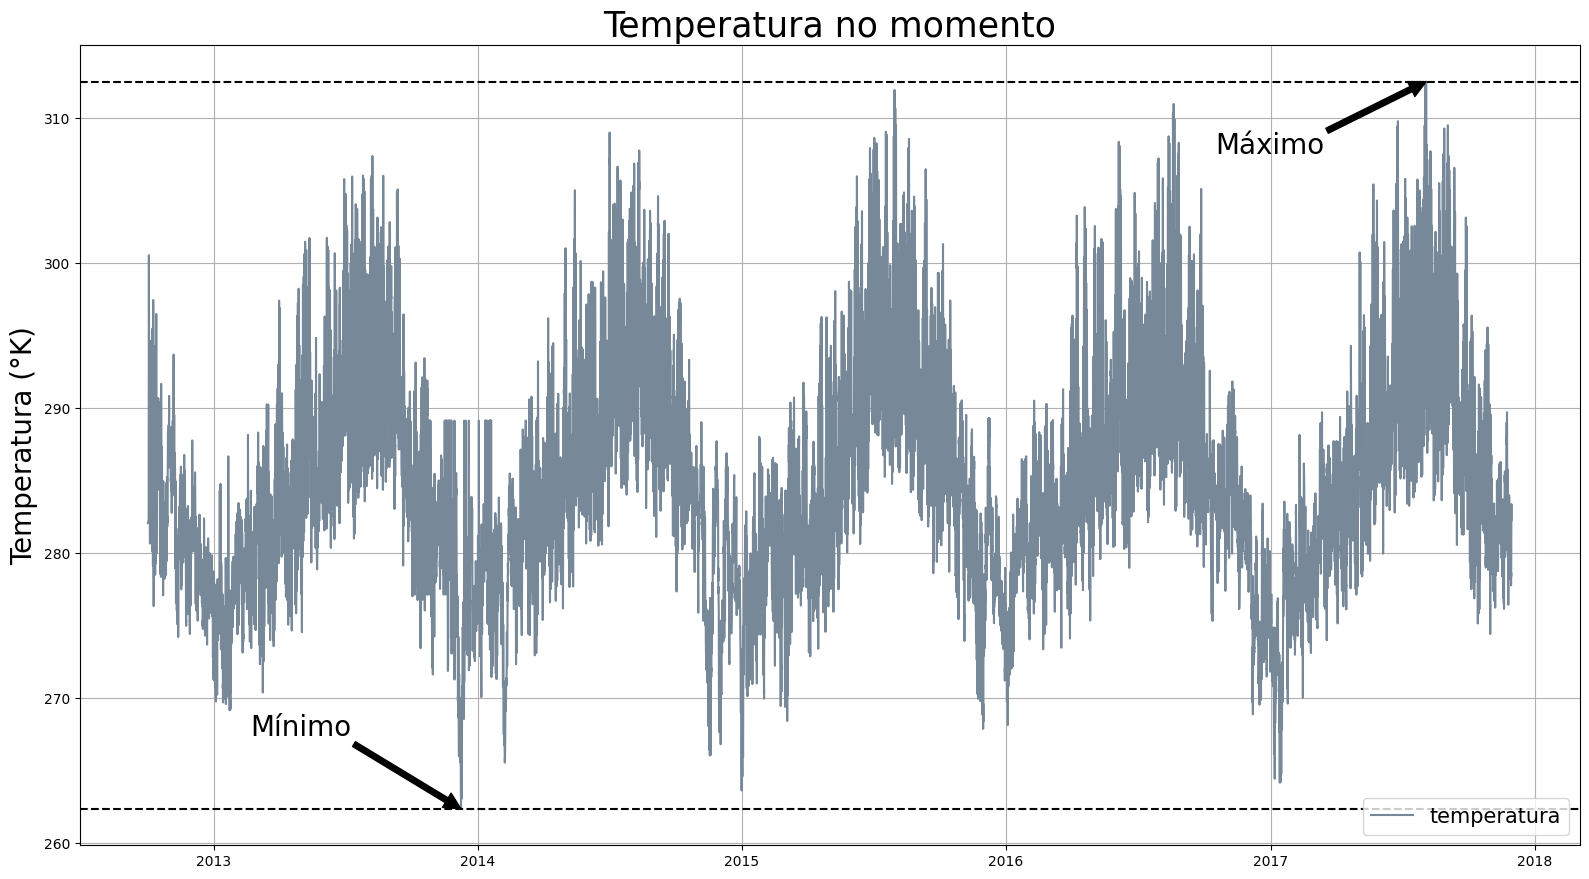

In [73]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(tempo.data, tempo.temperatura, color = 'lightslategray')

eixo.set_title("Temperatura no momento", fontsize = 25)
eixo.set_ylabel("Temperatura (°K)", fontsize = 20)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 15)
eixo.grid(True)
eixo.axhline(max(tempo.temperatura), color = 'k', linestyle = '--')
eixo.axhline(min(tempo.temperatura), color = 'k', linestyle = '--')

x1 = tempo.data[tempo.temperatura.idxmax()]
y1 = max(tempo.temperatura)
x2 = tempo.data[tempo.temperatura.idxmax() - 7000]
y2 = max(tempo.temperatura - 5)
eixo.annotate("Máximo", xy= (x1, y1), fontsize = 20,
              xytext= (x2, y2),
              arrowprops=dict(facecolor = 'k')
              )

x1 = tempo.data[tempo.temperatura.idxmin()]
y1 = min(tempo.temperatura)
x2 = tempo.data[tempo.temperatura.idxmin() - 7000]
y2 = min(tempo.temperatura + 5)
eixo.annotate("Mínimo", xy= (x1, y1), fontsize = 20,
              xytext= (x2, y2),
              arrowprops=dict(facecolor = 'k')
              )

In [76]:
temperatura_por_dia_da_semana = tempo.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

[Text(0, 0, 'Domingo'),
 Text(1, 0, 'Segunda'),
 Text(2, 0, 'Terça'),
 Text(3, 0, 'Quarta'),
 Text(4, 0, 'Quinta'),
 Text(5, 0, 'Sexta'),
 Text(6, 0, 'Sábado')]

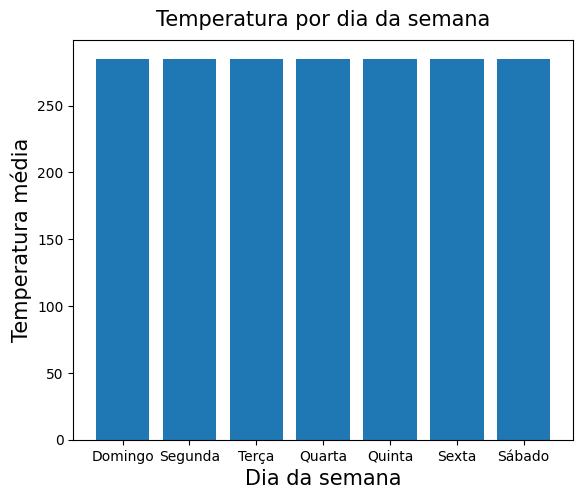

In [79]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(temperatura_por_dia_da_semana))

eixo.bar(indice, temperatura_por_dia_da_semana)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)